In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches_df=pd.read_csv('IPL Matches 2008-2020.csv')
Deliveries_df=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
print(matches_df.shape,Deliveries_df.shape)

(816, 17) (193468, 18)


In [4]:
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
Deliveries_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
Deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
matches_df[matches_df['city'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [9]:
matches_df.loc[matches_df['city'].isna(),'city']='Dubai'

In [10]:
matches_df[matches_df['winner'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [11]:
matches_df.loc[matches_df['winner'].isna(),'winner']='No Winner'
matches_df.loc[matches_df['player_of_match'].isna(),'player_of_match']='No_Player_of_the_match'

In [12]:
matches_df.loc[matches_df['result_margin'].isna(),'result_margin']=0

In [13]:
matches_df.loc[matches_df['result'].isna(),'result']='No_result'

In [14]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  816 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           816 non-null    object 
 11  result           816 non-null    object 
 12  result_margin    816 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [15]:
matches_df['date']=pd.to_datetime(matches_df['date'])

In [16]:
matches_df['date']=pd.DatetimeIndex(matches_df['date']).year

In [17]:
matches_df.rename(columns={'date':'season'},inplace=True)

In [40]:
matches_df['season'].value_counts().reset_index()

,index,season
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2018,60
7,2019,60
8,2020,60
9,2015,59


In [19]:
total_matches=matches_df['season'].value_counts().reset_index()

[Text(0.5, 1.0, 'Total no of matches per season')]

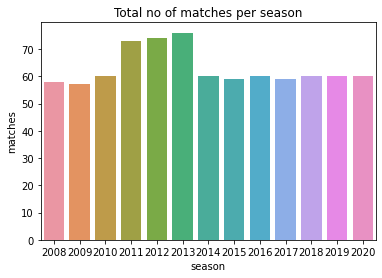

In [20]:
total_matches.columns=['season','matches']
sns.barplot(x='season',y='matches',data=total_matches).set(title='Total no of matches per season')

In [21]:
matches_played=pd.concat([matches_df['team1'],matches_df['team2']],axis=0)
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total_matches_played']
matches_played['Winner']=matches_df['winner'].value_counts().reset_index()['winner']
matches_played['winning_percentage']=(matches_played['Winner']/matches_played['Total_matches_played'])*100

In [22]:
matches_played

,Team,Total_matches_played,Winner,winning_percentage
0,Mumbai Indians,203,120,59.113300
1,Royal Challengers Bangalore,195,106,54.358974
2,Kolkata Knight Riders,192,99,51.562500
3,Kings XI Punjab,190,91,47.894737
4,Chennai Super Kings,178,88,49.438202
5,Delhi Daredevils,161,81,50.310559
6,Rajasthan Royals,161,67,41.614907
7,Sunrisers Hyderabad,124,66,53.225806
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,19,41.304348


[Text(0, 0, 'Mumbai Indians'),
 Text(1, 0, 'Royal Challengers Bangalore'),
 Text(2, 0, 'Kolkata Knight Riders'),
 Text(3, 0, 'Kings XI Punjab'),
 Text(4, 0, 'Chennai Super Kings'),
 Text(5, 0, 'Delhi Daredevils'),
 Text(6, 0, 'Rajasthan Royals'),
 Text(7, 0, 'Sunrisers Hyderabad'),
 Text(8, 0, 'Deccan Chargers'),
 Text(9, 0, 'Pune Warriors'),
 Text(10, 0, 'Delhi Capitals'),
 Text(11, 0, 'Gujarat Lions'),
 Text(12, 0, 'Rising Pune Supergiant'),
 Text(13, 0, 'Kochi Tuskers Kerala'),
 Text(14, 0, 'Rising Pune Supergiants')]

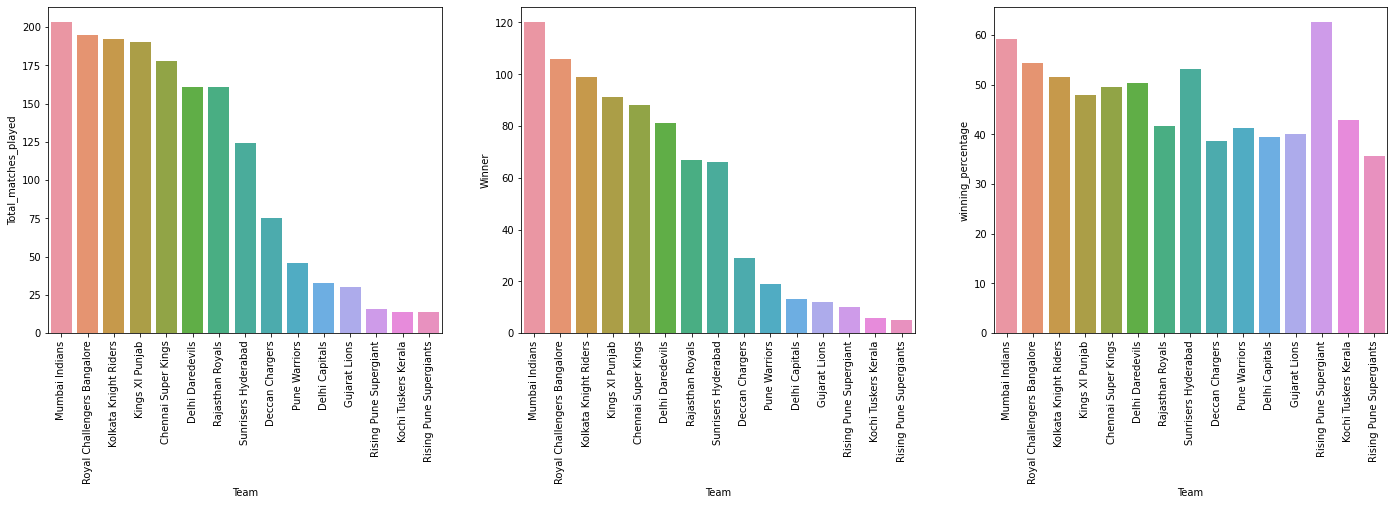

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.barplot(x='Team',y='Total_matches_played',data=matches_played,ax=axes[0]).set_xticklabels(matches_played['Team'],rotation=90)
sns.barplot(x='Team',y='Winner',data=matches_played,ax=axes[1]).set_xticklabels(matches_played['Team'],rotation=90)
sns.barplot(x='Team',y='winning_percentage',data=matches_played,ax=axes[2]).set_xticklabels(matches_played['Team'],rotation=90)

In [42]:
matches_city=matches_df['city'].value_counts().reset_index().sort_values(by='city',ascending=False)
matches_city.columns=['City','No_of_matches']

[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'Kolkata'),
 Text(2, 0, 'Delhi'),
 Text(3, 0, 'Bangalore'),
 Text(4, 0, 'Hyderabad'),
 Text(5, 0, 'Chennai'),
 Text(6, 0, 'Chandigarh'),
 Text(7, 0, 'Jaipur'),
 Text(8, 0, 'Dubai'),
 Text(9, 0, 'Pune'),
 Text(10, 0, 'Abu Dhabi'),
 Text(11, 0, 'Bengaluru'),
 Text(12, 0, 'Durban'),
 Text(13, 0, 'Visakhapatnam'),
 Text(14, 0, 'Sharjah'),
 Text(15, 0, 'Centurion'),
 Text(16, 0, 'Ahmedabad'),
 Text(17, 0, 'Rajkot'),
 Text(18, 0, 'Dharamsala'),
 Text(19, 0, 'Indore'),
 Text(20, 0, 'Johannesburg'),
 Text(21, 0, 'Cuttack'),
 Text(22, 0, 'Cape Town'),
 Text(23, 0, 'Ranchi'),
 Text(24, 0, 'Port Elizabeth'),
 Text(25, 0, 'Raipur'),
 Text(26, 0, 'Kochi'),
 Text(27, 0, 'Kanpur'),
 Text(28, 0, 'East London'),
 Text(29, 0, 'Kimberley'),
 Text(30, 0, 'Nagpur'),
 Text(31, 0, 'Bloemfontein')]

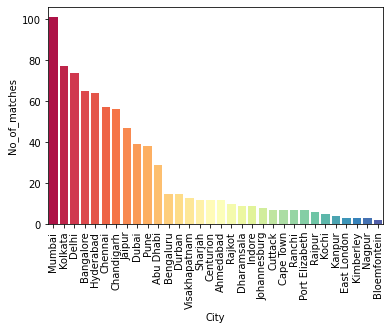

In [46]:
sns.barplot(x='City',y='No_of_matches',data=matches_city,palette="Spectral", saturation=1).set_xticklabels(matches_city['City'],rotation=90)


In [26]:
matches_venue=matches_df['venue'].value_counts().reset_index()
matches_venue.columns=['Venue','No_of_matches']

[Text(0, 0, 'Eden Gardens'),
 Text(1, 0, 'Feroz Shah Kotla'),
 Text(2, 0, 'Wankhede Stadium'),
 Text(3, 0, 'M Chinnaswamy Stadium'),
 Text(4, 0, 'Rajiv Gandhi International Stadium, Uppal'),
 Text(5, 0, 'MA Chidambaram Stadium, Chepauk'),
 Text(6, 0, 'Sawai Mansingh Stadium'),
 Text(7, 0, 'Punjab Cricket Association Stadium, Mohali'),
 Text(8, 0, 'Dubai International Cricket Stadium'),
 Text(9, 0, 'Sheikh Zayed Stadium'),
 Text(10, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
 Text(11, 0, 'Maharashtra Cricket Association Stadium'),
 Text(12, 0, 'Sharjah Cricket Stadium'),
 Text(13, 0, 'Dr DY Patil Sports Academy'),
 Text(14, 0, 'Subrata Roy Sahara Stadium'),
 Text(15, 0, 'M.Chinnaswamy Stadium'),
 Text(16, 0, 'Kingsmead'),
 Text(17, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
 Text(18, 0, 'Sardar Patel Stadium, Motera'),
 Text(19, 0, 'SuperSport Park'),
 Text(20, 0, 'Brabourne Stadium'),
 Text(21, 0, 'Saurashtra Cricket Association Stadium'),
 Text(22, 0, 

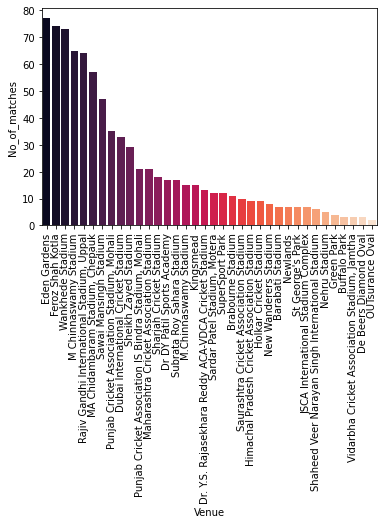

In [47]:
sns.barplot(x='Venue',y='No_of_matches',data=matches_venue,palette="rocket",saturation=1).set_xticklabels(matches_venue['Venue'],rotation=90)

In [28]:
runs=matches_df.merge(Deliveries_df,left_on='id',right_on='id',how='left').drop('id',axis=1)
total_season_run=runs.groupby(['season'])['total_runs'].sum().reset_index()
matches_season = matches_df.groupby(['season']).count()['id'].reset_index()
matches_season.rename(columns={'id':'matches'},inplace=True)
matches_season['total_runs']=total_season_run['total_runs']
matches_season['average_runs_per_match']=matches_season['total_runs']/matches_season['matches']


In [29]:
matches_season

,season,matches,total_runs,average_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,59,18332,310.711864
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


[Text(0, 0, '2008'),
 Text(1, 0, '2009'),
 Text(2, 0, '2010'),
 Text(3, 0, '2011'),
 Text(4, 0, '2012'),
 Text(5, 0, '2013'),
 Text(6, 0, '2014'),
 Text(7, 0, '2015'),
 Text(8, 0, '2016'),
 Text(9, 0, '2017'),
 Text(10, 0, '2018'),
 Text(11, 0, '2019'),
 Text(12, 0, '2020')]

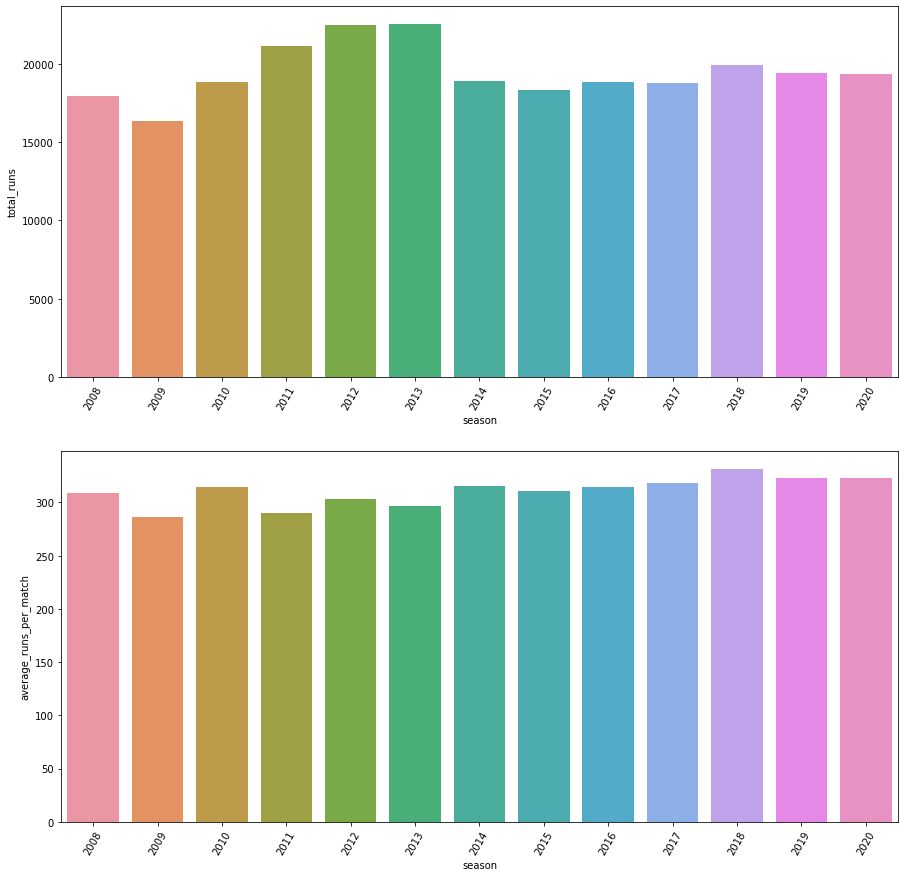

In [30]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,15))
sns.barplot(x='season',y='total_runs',data=matches_season,ax=axes[0]).set_xticklabels(matches_season['season'],rotation=60)
sns.barplot(x='season',y='average_runs_per_match',data=matches_season,ax=axes[1]).set_xticklabels(matches_season['season'],rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

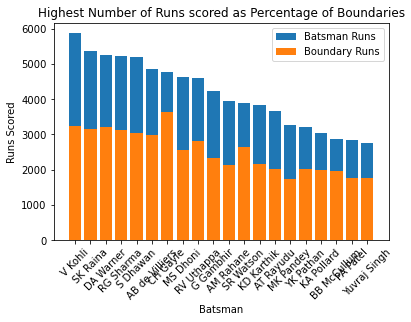

In [31]:
Deliveries_df['boundaries']=0

Deliveries_df.loc[(Deliveries_df['batsman_runs']>=4) & (Deliveries_df['batsman_runs']!=6),'boundaries']=4
Deliveries_df.loc[(Deliveries_df['batsman_runs']>=6),'boundaries']=6

percentage_run_by_boundaries=pd.merge(
        Deliveries_df[['batsman','batsman_runs']].groupby('batsman').sum().reset_index(),
        Deliveries_df[['batsman','boundaries']].groupby('batsman').sum().reset_index(),
        how='outer')

percentage_run_by_boundaries['percentage_run']=np.round(percentage_run_by_boundaries['boundaries']*100/percentage_run_by_boundaries['batsman_runs'],2)
percentage_run_by_boundaries=percentage_run_by_boundaries.sort_values(by='batsman_runs',ascending=False)

percentage_run_by_boundaries.dropna(inplace=True)
percentage_run_by_boundaries=percentage_run_by_boundaries.sort_values(by='batsman_runs',ascending=False).head(20)


plt.bar(percentage_run_by_boundaries['batsman'], percentage_run_by_boundaries['batsman_runs'], label='Batsman Runs',bottom=0)
plt.bar(percentage_run_by_boundaries['batsman'], percentage_run_by_boundaries['boundaries'], label='Boundary Runs',bottom=0)
plt.title('Highest Number of Runs scored as Percentage of Boundaries')
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.legend()
plt.xticks(rotation=45)

In [32]:
percentage_run_by_boundaries

,batsman,batsman_runs,boundaries,percentage_run
505,V Kohli,5878,3228,54.92
438,SK Raina,5368,3140,58.49
116,DA Warner,5254,3214,61.17
379,RG Sharma,5230,3120,59.66
407,S Dhawan,5197,3026,58.23
24,AB de Villiers,4849,2970,61.25
96,CH Gayle,4772,3630,76.07
301,MS Dhoni,4632,2548,55.01
398,RV Uthappa,4607,2806,60.91
154,G Gambhir,4217,2322,55.06


# Fantsy league 
Batsman stat


In [33]:
#man of the match
man_of_the_match=matches_df.groupby(['player_of_match'])['player_of_match'].count().sort_values(ascending=False)
man_of_the_match=man_of_the_match.to_frame().rename(columns={'player_of_match':'Times'}).reset_index()
man_of_the_match
#century
century= Deliveries_df.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
century=century[century['batsman_runs']>=100]
century=century.groupby(['batsman']).agg({'count'})
century.columns=century.columns.droplevel()
century=century.sort_values(by='count',ascending=False).reset_index()

#half century
half_century=Deliveries_df.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
half_century=half_century[half_century['batsman_runs']>=50]
half_century=half_century[half_century['batsman_runs']<100]
half_century =half_century.groupby(['batsman']).agg({'count'})
half_century.columns=half_century.columns.droplevel()
half_century=half_century.sort_values(by='count',ascending=False).reset_index()

#no_of_30's
run_30=Deliveries_df.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
run_30=run_30[run_30['batsman_runs']>=30]
run_30=run_30[run_30['batsman_runs']<50]
run_30=run_30.groupby(['batsman']).agg({'count'})
run_30.columns=run_30.columns.droplevel()
run_30=run_30.sort_values(by='count',ascending=False).reset_index()


run_stat=pd.merge(century,half_century,on='batsman',how='right')
run_stat=pd.merge(run_stat,run_30,on='batsman',how='right')
run_stat=run_stat.fillna(0)

In [34]:
run_stat

,batsman,count_x,count_y,count
0,RV Uthappa,0.0,24.0,43
1,V Kohli,5.0,39.0,40
2,MS Dhoni,0.0,23.0,39
3,SK Raina,1.0,38.0,37
4,KD Karthik,0.0,19.0,34
...,...,...,...,...
228,K Gowtham,0.0,0.0,1
229,K Rabada,0.0,0.0,1
230,R McLaren,0.0,1.0,1
231,Bipul Sharma,0.0,0.0,1


In [35]:
#strike_rate
strike_rate=Deliveries_df.groupby(['batsman']).agg({'ball':'count',
                                                    'batsman_runs':'mean'}).sort_values(by='ball',ascending=False)
strike_rate.rename(columns={'batsman_runs':'strike rate'},inplace=True)

strike_rate['strike rate']=strike_rate['strike rate']*100

#runs_per_match
runs_per_match=Deliveries_df.groupby(['batsman','id']).agg({'batsman_runs':'sum'})


#total runs
total_runs=runs_per_match.groupby(['batsman']).agg({'sum','mean','count'})
total_runs.rename(columns={'sum':'batsman run','count':'Match count','mean':'Average score'},inplace=True)
total_runs.columns=total_runs.columns.droplevel()


#Sixes
sixes=Deliveries_df[['batsman','batsman_runs']][Deliveries_df['batsman_runs']==6].groupby(['batsman']).agg({'batsman_runs':'count'})
       
#four
four=Deliveries_df[['batsman','batsman_runs']][Deliveries_df['batsman_runs']==4].groupby(['batsman']).agg({'batsman_runs':'count'})


#Batsman stats
batsman_stats=pd.merge(pd.merge(pd.merge(strike_rate,total_runs,left_index=True,right_index=True),
                                        sixes,left_index=True,right_index=True),four,left_index=True,
                                 right_index=True)       
                                        

In [36]:
batsman_stats.rename(columns={
                      'ball':'Ball',
                       'strike rate':'Strike Rate',
                       'batsman run':'Batsman Run',
                       'batsman_runs_x':"six's",
                        'batsman_runs_y':"Four's"
                     },inplace=True)


In [37]:

batsman_stats=pd.merge(batsman_stats,run_stat,on='batsman',how='left').fillna(0)
batsman_stats.rename(columns={
    'batsman':'Batsman',
    'count_x':"100's",
    'count_y':"50's",
    'count':"30's"
},inplace=True)

In [38]:
batsman_stats

,Batsman,Ball,Strike Rate,Batsman Run,Average score,Match count,six's,Four's,100's,50's,30's
0,V Kohli,4609,127.533087,5878,31.945652,184,202,504,5.0,39.0,40.0
1,S Dhawan,4208,123.502852,5197,29.697143,175,109,591,2.0,41.0,29.0
2,RG Sharma,4088,127.935421,5230,26.958763,194,214,458,1.0,39.0,33.0
3,SK Raina,4041,132.838406,5368,28.402116,189,194,493,1.0,38.0,37.0
4,DA Warner,3819,137.575281,5254,37.000000,142,195,510,4.0,48.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
331,P Sahu,13,146.153846,19,9.500000,2,1,1,0.0,0.0,0.0
332,SA Abbott,13,115.384615,15,7.500000,2,1,1,0.0,0.0,0.0
333,TU Deshpande,12,175.000000,21,10.500000,2,1,2,0.0,0.0,0.0
334,BJ Haddin,11,163.636364,18,18.000000,1,1,2,0.0,0.0,0.0


# Bowler stats